# Proces Hawkesa na podstawie zbioru danych Retweets
## Źródło danych
* Przy modelowaniu wykorzystamy zbiór danych zscapowane posty wraz z retweetami: [dostępny tutaj](http://snap.stanford.edu/seismic/#data)
* Warto podkreślić że zbiór zawiera jedynie tweety mające przynajmniej 50 retweetów.
## Uzasadnienie wyboru zbioru
* Szerzenie się informacji w mediach społecznościowych dość dobrze można modelować przy użyciu procesu Hawkesa.
* Możemy założyć że pojawienie się tweetów w zadanym temacie wpływa na pojawienie się kolejnych a dodatkowo tweety "przeterminowują się" - im starszy post tym mniejsza szansa że wpłynie na pojawienie się kolejnych.
* Odpowiada to processowi Hawkesa gdzie na wystąpienie zdarzenia wpływają uprzednie zdarzenia proporcjonalnie do tego jak wiele czasu minęło od ich wystąpienia
* Jako `magnitude` zdarzenia przyjmiemy liczbę użytkowników followujących autora tweeta (podejście proponowonae w bibliotece `evenly`).
* Wybrany zbiór danych był już wykorzystywany w kontekście procesów Hawkesa np. w pracy [Transformer Hawkes Process](https://arxiv.org/abs/2002.09291).
## Struktura zbioru omówiona jest w notebooku `eda`.

In [1]:
library(evently)
library(repr)
library(parallel)

In [2]:
options(repr.plot.width=14, repr.plot.height=7, repr.plot.res = 200)

In [3]:
DATA_PATH <- "/home/cicheck/Downloads/retweets"

## Load data

In [4]:
tweets_df = read.csv(file = paste(DATA_PATH, "tweets.csv", sep = "/"), header = T)
head(tweets_df)
colnames(tweets_df) = c("time", "magnitude")
head(tweets_df)

,relative_time_second,number_of_followers
,<dbl>,<dbl>
1,0,33
2,84833,46828
3,84878,208
4,84883,37
5,84900,137
6,84904,254


,time,magnitude
,<dbl>,<dbl>
1,0,33
2,84833,46828
3,84878,208
4,84883,37
5,84900,137
6,84904,254


In [5]:
index_df = read.csv(file = paste(DATA_PATH, "index.csv", sep = "/"), header = T)
head(index_df)

,tweet_id,post_time_day,start_ind,end_ind
,<dbl>,<dbl>,<int>,<int>
1,1.224346e+17,0.9266435,1,175
2,1.224497e+17,0.9681597,176,369
3,1.224502e+17,0.9695602,370,703
4,1.224430e+17,0.9497338,704,827
5,1.224566e+17,0.9873727,828,941
6,1.223103e+17,0.5837269,942,1029


In [6]:
cascades <- rep(NULL, nrow(index_df))

for (row in 1:nrow(index_df)) {
    cascade_start_ind <- index_df[row, "start_ind"]
    cascade_end_ind  <- index_df[row, "end_ind"]
    cascades[[row]] <- tweets_df[cascade_start_ind:cascade_end_ind,]
}

In [7]:
observation_times <- rep(NULL, length(cascades))

for (cascade_ind in 1:length(cascades)) {
    observation_times[[cascade_ind]] <- max(cascades[[cascade_ind]]$time)
}

In [8]:
cascade_lengths <- rep(NULL, nrow(index_df))

for (row in 1:nrow(index_df)) {
    cascade_lengths[row] <- nrow(cascades[[row]])
}
cascade_lengths <- unlist(cascade_lengths)

In [9]:
indices_of_top_lenghts <- kit::topn(cascade_lengths, 10,decreasing = T)
first_cascade_index <- indices_of_top_lenghts[9]
second_cascade_index <- indices_of_top_lenghts[10]

In [10]:
cascade_lengths[first_cascade_index]

[1] 16422

In [11]:
cascade_lengths[second_cascade_index]

[1] 16123

In [17]:
first_cascade <- cascades[[first_cascade_index]]
first_cascade$time
first_cascade_split_time <- first_cascade$time[1000]
first_cascade_train <- first_cascade[with(first_cascade, time <= first_cascade_split_time),]

[1]      0      1      7      8      8      9      9      9      9      9
   [11]     10     10     10     11     11     11     11     11     11     12
   [21]     12     14     14     14     14     15     15     16     16     16
   [31]     16     16     16     16     17     17     17     17     17     18
   [41]     18     18     18     18     18     18     18     18     18     18
   [51]     18     18     19     19     20     20     20     20     20     21
   [61]     21     21     21     21     21     21     22     22     22     22
   [71]     22     22     23     23     23     23     23     23     24     24
   [81]     24     24     24     24     24     25     25     25     25     25
   [91]     25     26     26     26     26     26     26     26     26     26
  [101]     26     27     27     27     27     27     27     27     27     28
  [111]     28     28     28     28     28     28     28     28     28     28
  [121]     28     28     29     29     29     29     29     29     29     29
  [131]     29     29     29     29     30     30     30     30     30     30
  [141]     30     31     31     31     31     31     31     31     31     31
  [151]     32     32     32     32     32     32     32     32     32     33
  [161]     33     33     33     33     33     34     34     34     34     34
  [171]     34     34     34     34     34     34     34     35     35     35
  [181]     35     35     35     35     35     35     35     35     35     35
  [191]     36     36     36     36     36     36     36     36     36     36
  [201]     36     36     36     36     37     37     37     37     37     37
  [211]     37     37     37     37     37     37     38     38     38     38
  [221]     38     38     38     38     38     38     38     38     39     39
  [231]     39     39     39     39     39     39     39     39     39     39
  [241]     40     40     40     40     40     40     40     40     41     41
  [251]     41     41     41     41     41     42     42     42     42     42
  [261]     42     42     42     42     42     42     42     43     43     43
  [271]     43     43     43     43     43     43     43     44     44     44
  [281]     44     44     44     44     44     44     44     44     44     44
  [291]     44     45     45     45     45     45     45     45     45     46
  [301]     46     46     46     46     46     46     46     46     47     47
  [311]     47     47     47     47     47     47     48     48     48     48
  [321]     48     48     48     48     48     48     48     48     48     48
  [331]     48     48     48     49     49     49     49     49     49     49
  [341]     49     49     49     49     50     50     50     50     50     50
  [351]     50     50     50     51     51     51     51     51     51     51
  [361]     51     52     52     52     52     52     52     52     52     52
  [371]     53     53     53     53     53     53     53     53     53     53
  [381]     54     54     54     54     54     54     54     54     54     54
  [391]     54     55     55     55     55     55     55     55     55     55
  [401]     55     55     55     55     56     56     56     56     56     56
  [411]     56     56     56     56     57     57     57     57     57     57
  [421]     57     58     58     58     58     58     58     58     59     59
  [431]     59     59     59     59     59     59     59     59     59     59
  [441]     59     59     59     60     60     60     60     60     60     60
  [451]     60     60     60     60     60     60     60     60     60     60
  [461]     60     61     61     61     61     61     61     61     61     61
  [471]     61     61     62     62     62     62     62     62     62     62
  [481]     62     62     62     62     63     63     63     63     63     63
  [491]     63     63     63     64     64     64     64     64     64     64
  [501]     64     64     64     64     64     64     64     65     65     65
  [511]     65     65     

In [18]:
second_cascade <- cascades[[second_cascade_index]]
second_cascade$time
second_cascade_split_time <- second_cascade$time[1000]
second_cascade_train <- second_cascade[with(second_cascade, time <= second_cascade_split_time),]

[1]      0      6      6      6      7      7      7      8      8      9
   [11]      9      9     10     10     10     10     10     10     11     12
   [21]     12     12     12     12     12     13     13     13     13     14
   [31]     14     14     14     14     14     14     14     14     15     15
   [41]     15     15     15     15     15     15     15     15     16     16
   [51]     16     16     16     16     17     17     17     18     18     18
   [61]     18     18     19     19     19     19     19     19     19     19
   [71]     20     20     20     20     20     20     20     20     20     20
   [81]     20     21     21     21     21     21     21     21     21     22
   [91]     22     22     22     22     22     23     23     23     23     23
  [101]     23     23     23     23     24     24     24     24     25     25
  [111]     25     25     25     25     26     26     26     26     26     26
  [121]     27     27     27     27     27     27     27     27     27     27
  [131]     27     28     28     28     28     28     28     28     29     29
  [141]     29     29     29     29     29     29     29     30     30     30
  [151]     30     30     30     30     30     30     30     31     31     31
  [161]     31     31     31     31     31     31     31     31     31     31
  [171]     31     31     31     31     31     32     32     32     32     32
  [181]     32     32     32     32     33     33     33     33     33     33
  [191]     33     33     33     33     33     33     34     34     34     34
  [201]     34     34     34     34     34     34     34     35     35     35
  [211]     35     35     35     35     35     35     35     35     35     35
  [221]     36     36     36     36     36     36     36     36     36     36
  [231]     36     37     37     37     37     37     37     37     37     37
  [241]     37     37     37     37     37     38     38     38     38     38
  [251]     38     38     38     39     39     39     39     39     39     39
  [261]     39     39     39     39     39     40     40     40     40     40
  [271]     41     41     41     41     41     41     41     42     42     42
  [281]     42     42     42     42     42     42     43     43     43     43
  [291]     43     43     43     43     43     43     44     44     44     44
  [301]     44     44     44     44     44     44     44     45     45     45
  [311]     45     45     45     45     45     45     45     45     45     45
  [321]     45     46     46     46     46     46     46     46     46     46
  [331]     47     47     47     47     47     47     47     47     47     47
  [341]     47     47     47     47     47     48     48     48     48     48
  [351]     48     48     49     49     49     49     49     49     49     49
  [361]     49     49     49     50     50     50     50     50     50     50
  [371]     50     50     50     50     50     50     50     50     50     51
  [381]     51     51     51     51     51     51     51     51     51     51
  [391]     52     52     52     52     52     52     52     52     52     52
  [401]     52     53     53     53     53     53     53     53     53     53
  [411]     53     53     53     53     54     54     54     54     54     54
  [421]     54     54     54     54     54     54     54     54     55     55
  [431]     55     55     55     55     56     56     56     56     56     56
  [441]     56     56     56     56     57     57     57     57     57     57
  [451]     57     57     57     57     57     57     58     58     58     58
  [461]     58     58     58     58     58     58     59     59     59     59
  [471]     59     59     59     59     59     60     60     60     60     60
  [481]     60     60     60     61     61     61     61     61     61     61
  [491]     61     61     62     62     62     62     62     62     62     62
  [501]     62     62     62     62     63     63     63     63     63     64
  [511]     64     64     

## Modelowanie przy pomocy procesu Hawkesa

* 🔴 Niestety dla zebranych wykorzystanie Power Law Distribution powoduje error w kodzie `evenly` dlatego ograniczymy sie do Exponential Distribution
* 🔴 Rozmiar danych treningowych musiał zostać ograniczony

In [34]:
first_model <- fit_series(
    first_cascade_train,
    model_type = 'mEXP',
    observation_time = max(first_cascade_train$time),
    #init_pars = data.frame(K = 5.98e-01, theta = 3.60e-02),
    cores = detectCores()
)
first_model

- Model: mEXP 
- No. of cascades: 1 
- init_par:
  K 7.47e+00; beta 5.70e-01; theta 1.16e+00
- par:
  K 8.81e-01; beta 2.48e-02; theta 8.74e+00
- Neg Log Likelihood: -1724.96 
- lower_bound:
  K 1.00e-100; beta 1.00e-100; theta 1.00e-100
- upper_bound:
  K 1.00e+04; beta 1.02e+00; theta 3.00e+02
- Convergence: 0 

In [32]:
second_model <- fit_series(
    second_cascade_train,
    model_type = 'mEXP',
    observation_time = max(second_cascade_train$time),
    cores = detectCores()
)
second_model

- Model: mEXP 
- No. of cascades: 1 
- init_par:
  K 7.99e+00; beta 7.55e-01; theta 6.54e-01
- par:
  K 9.98e-01; beta 1.65e-03; theta 8.29e+00
- Neg Log Likelihood: -1592.06 
- lower_bound:
  K 1.00e-100; beta 1.00e-100; theta 1.00e-100
- upper_bound:
  K 1.00e+04; beta 1.02e+00; theta 3.00e+02
- Convergence: 0 

## Porównanie dynamiki kaskad

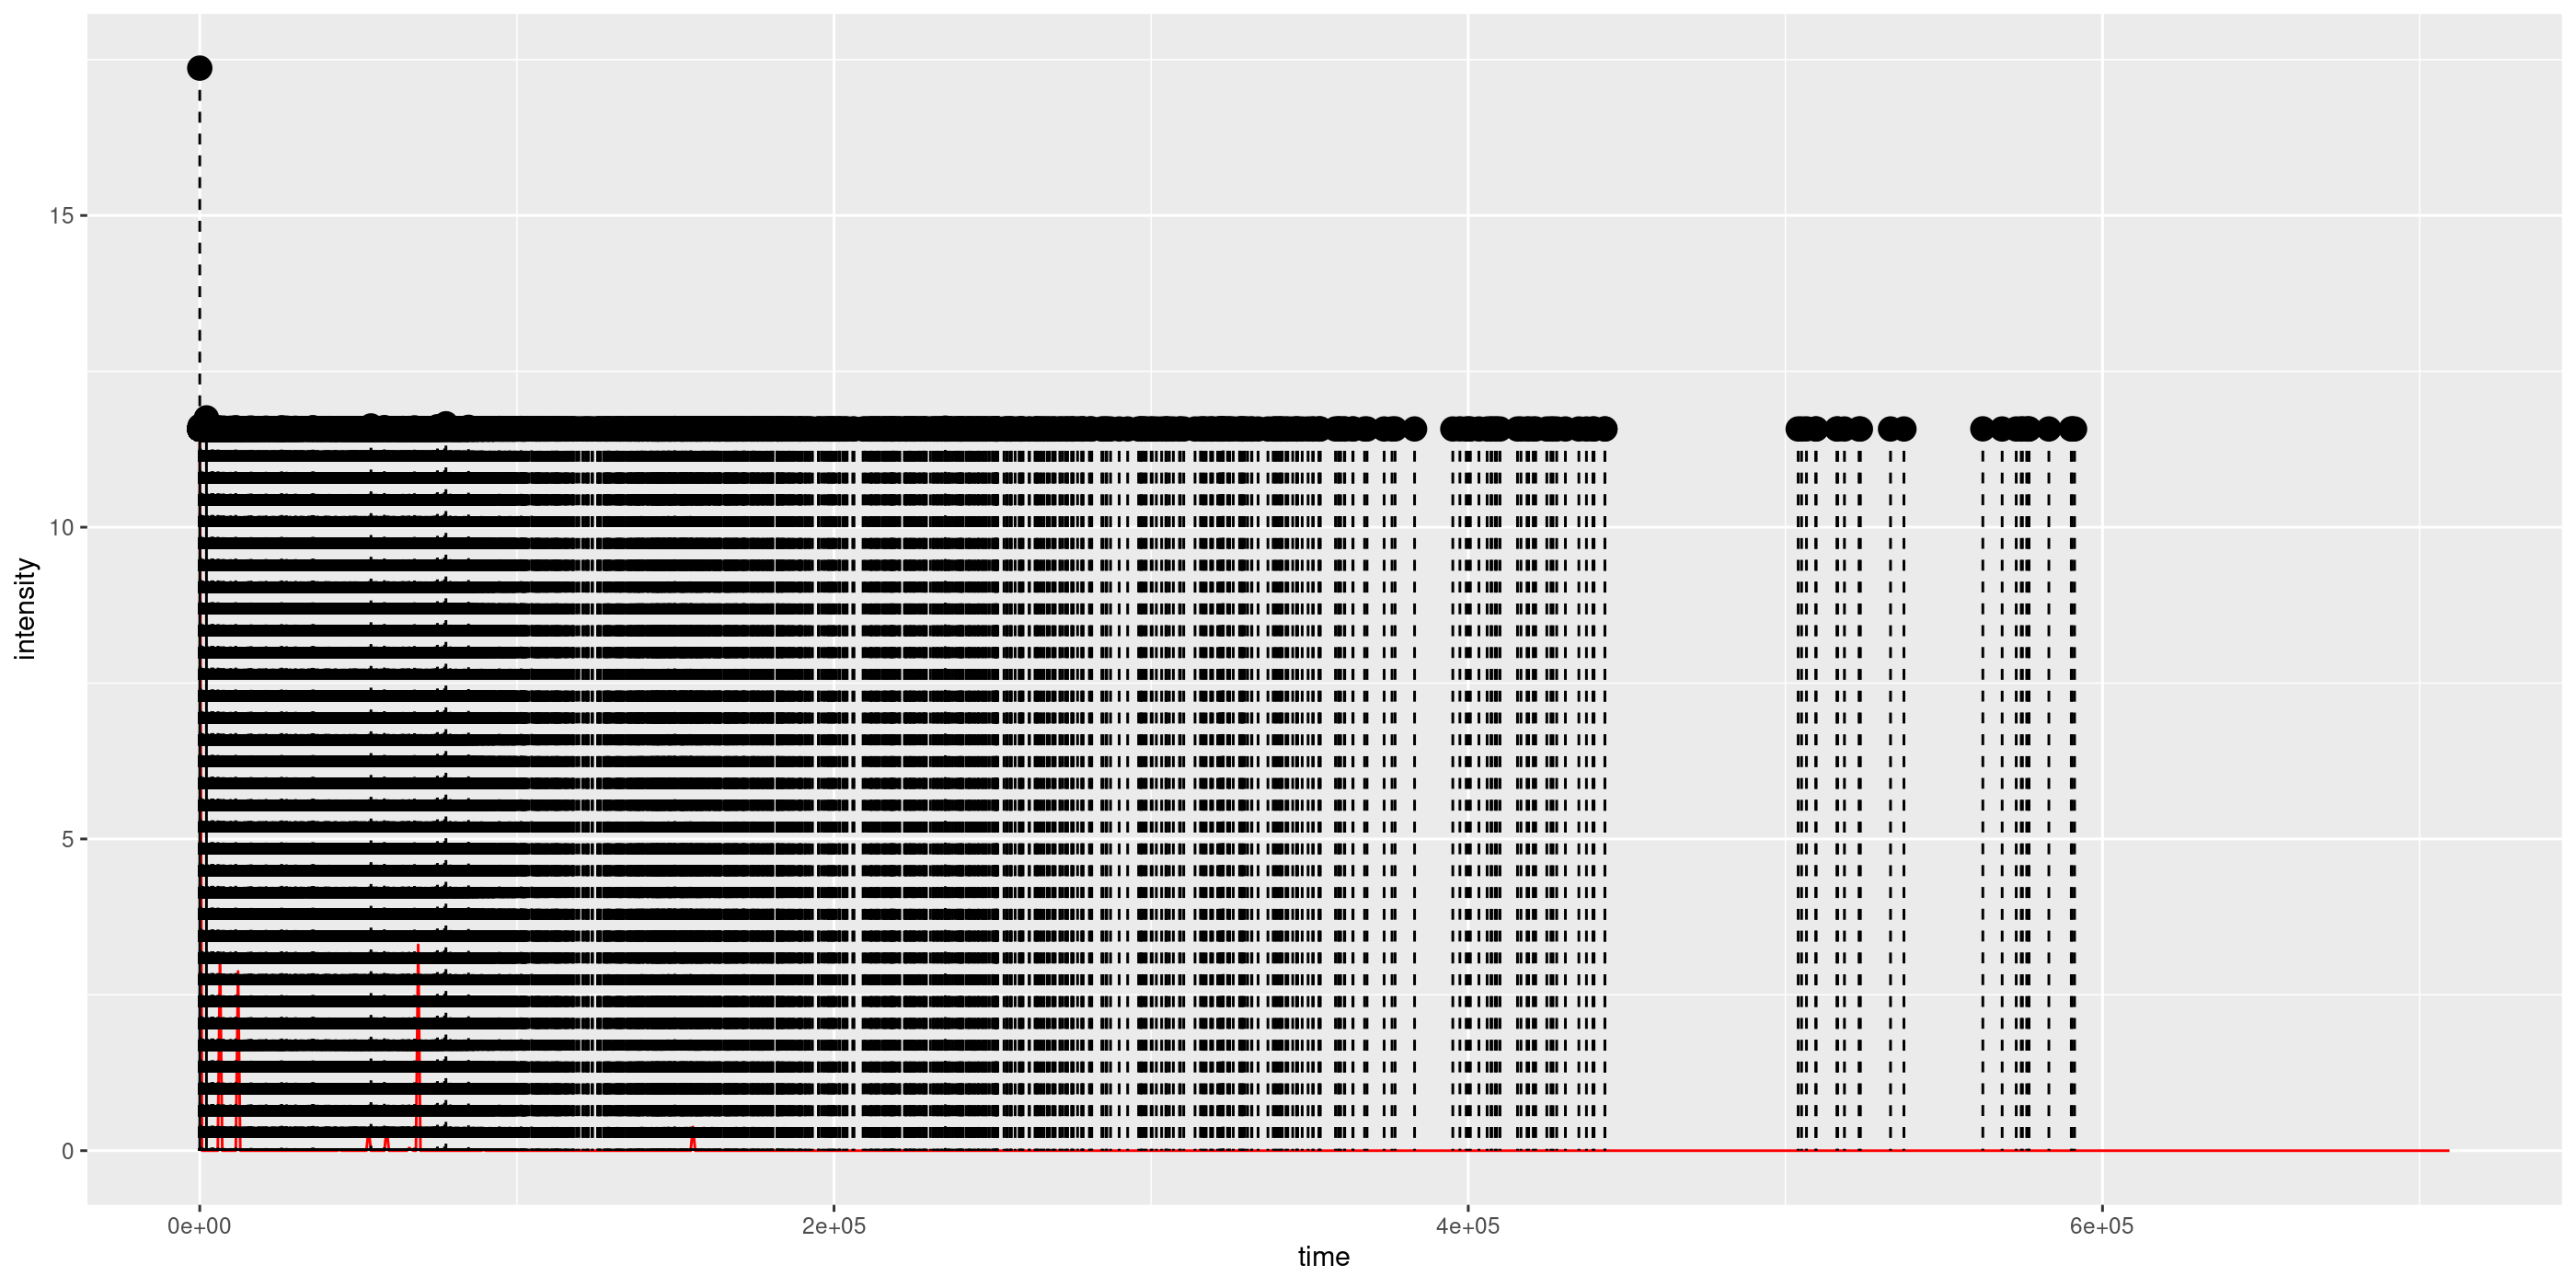

In [35]:
plot_event_series(first_model, cascade = first_cascade)

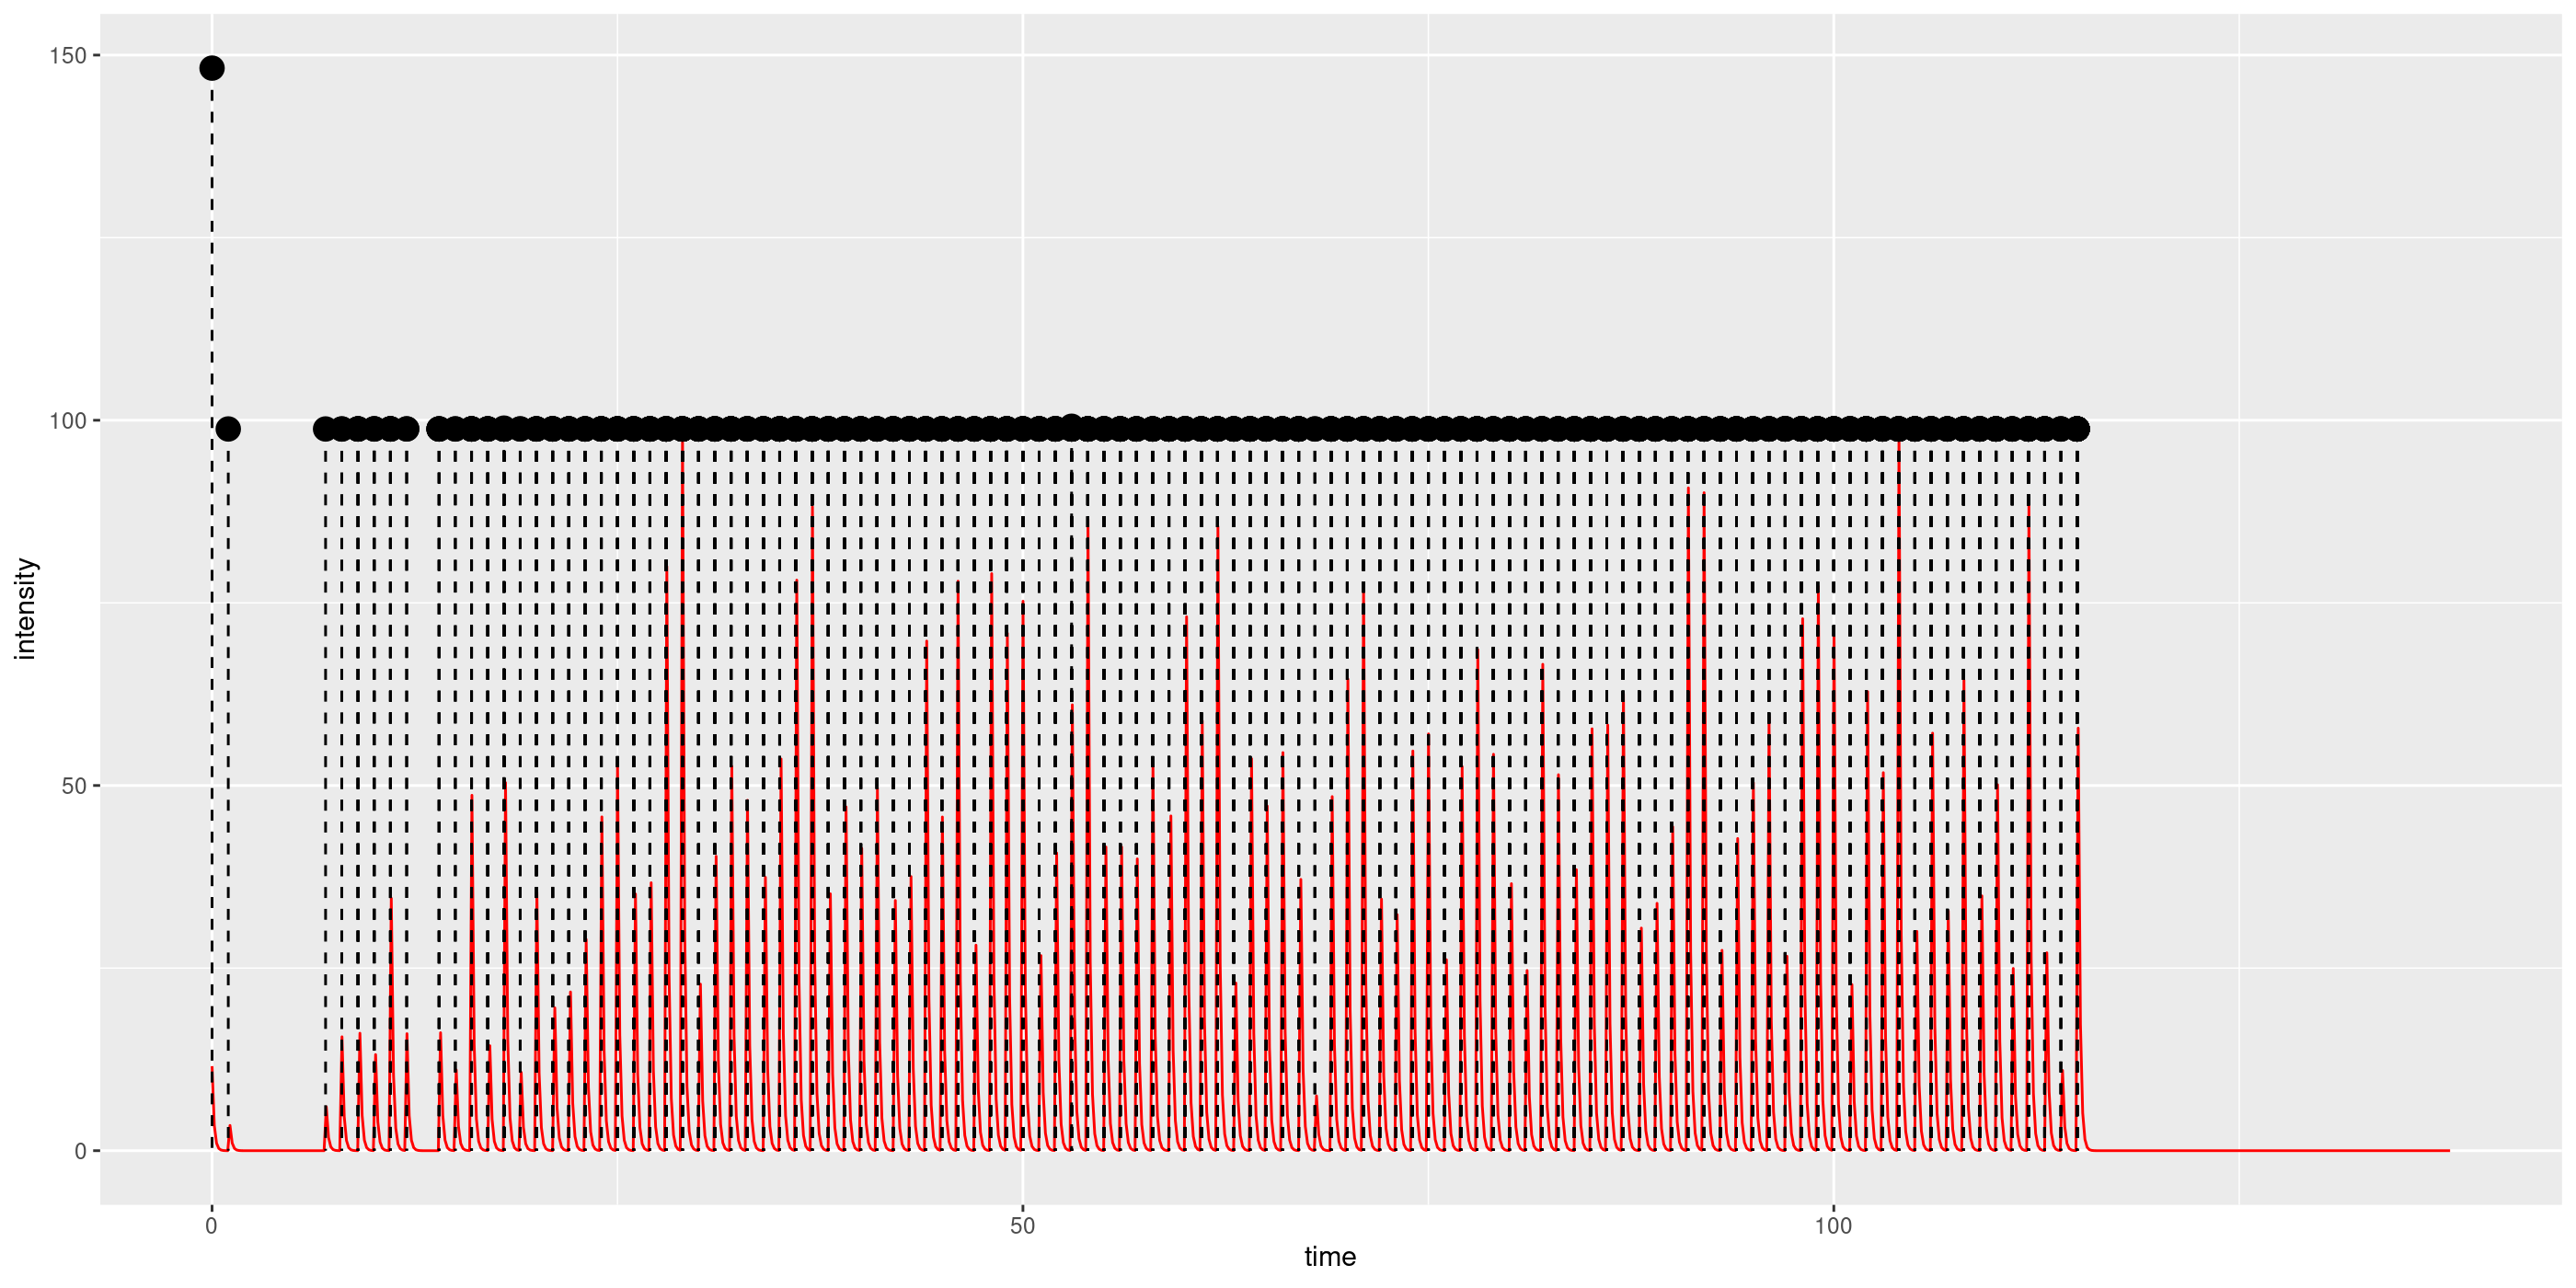

In [36]:
plot_event_series(first_model)

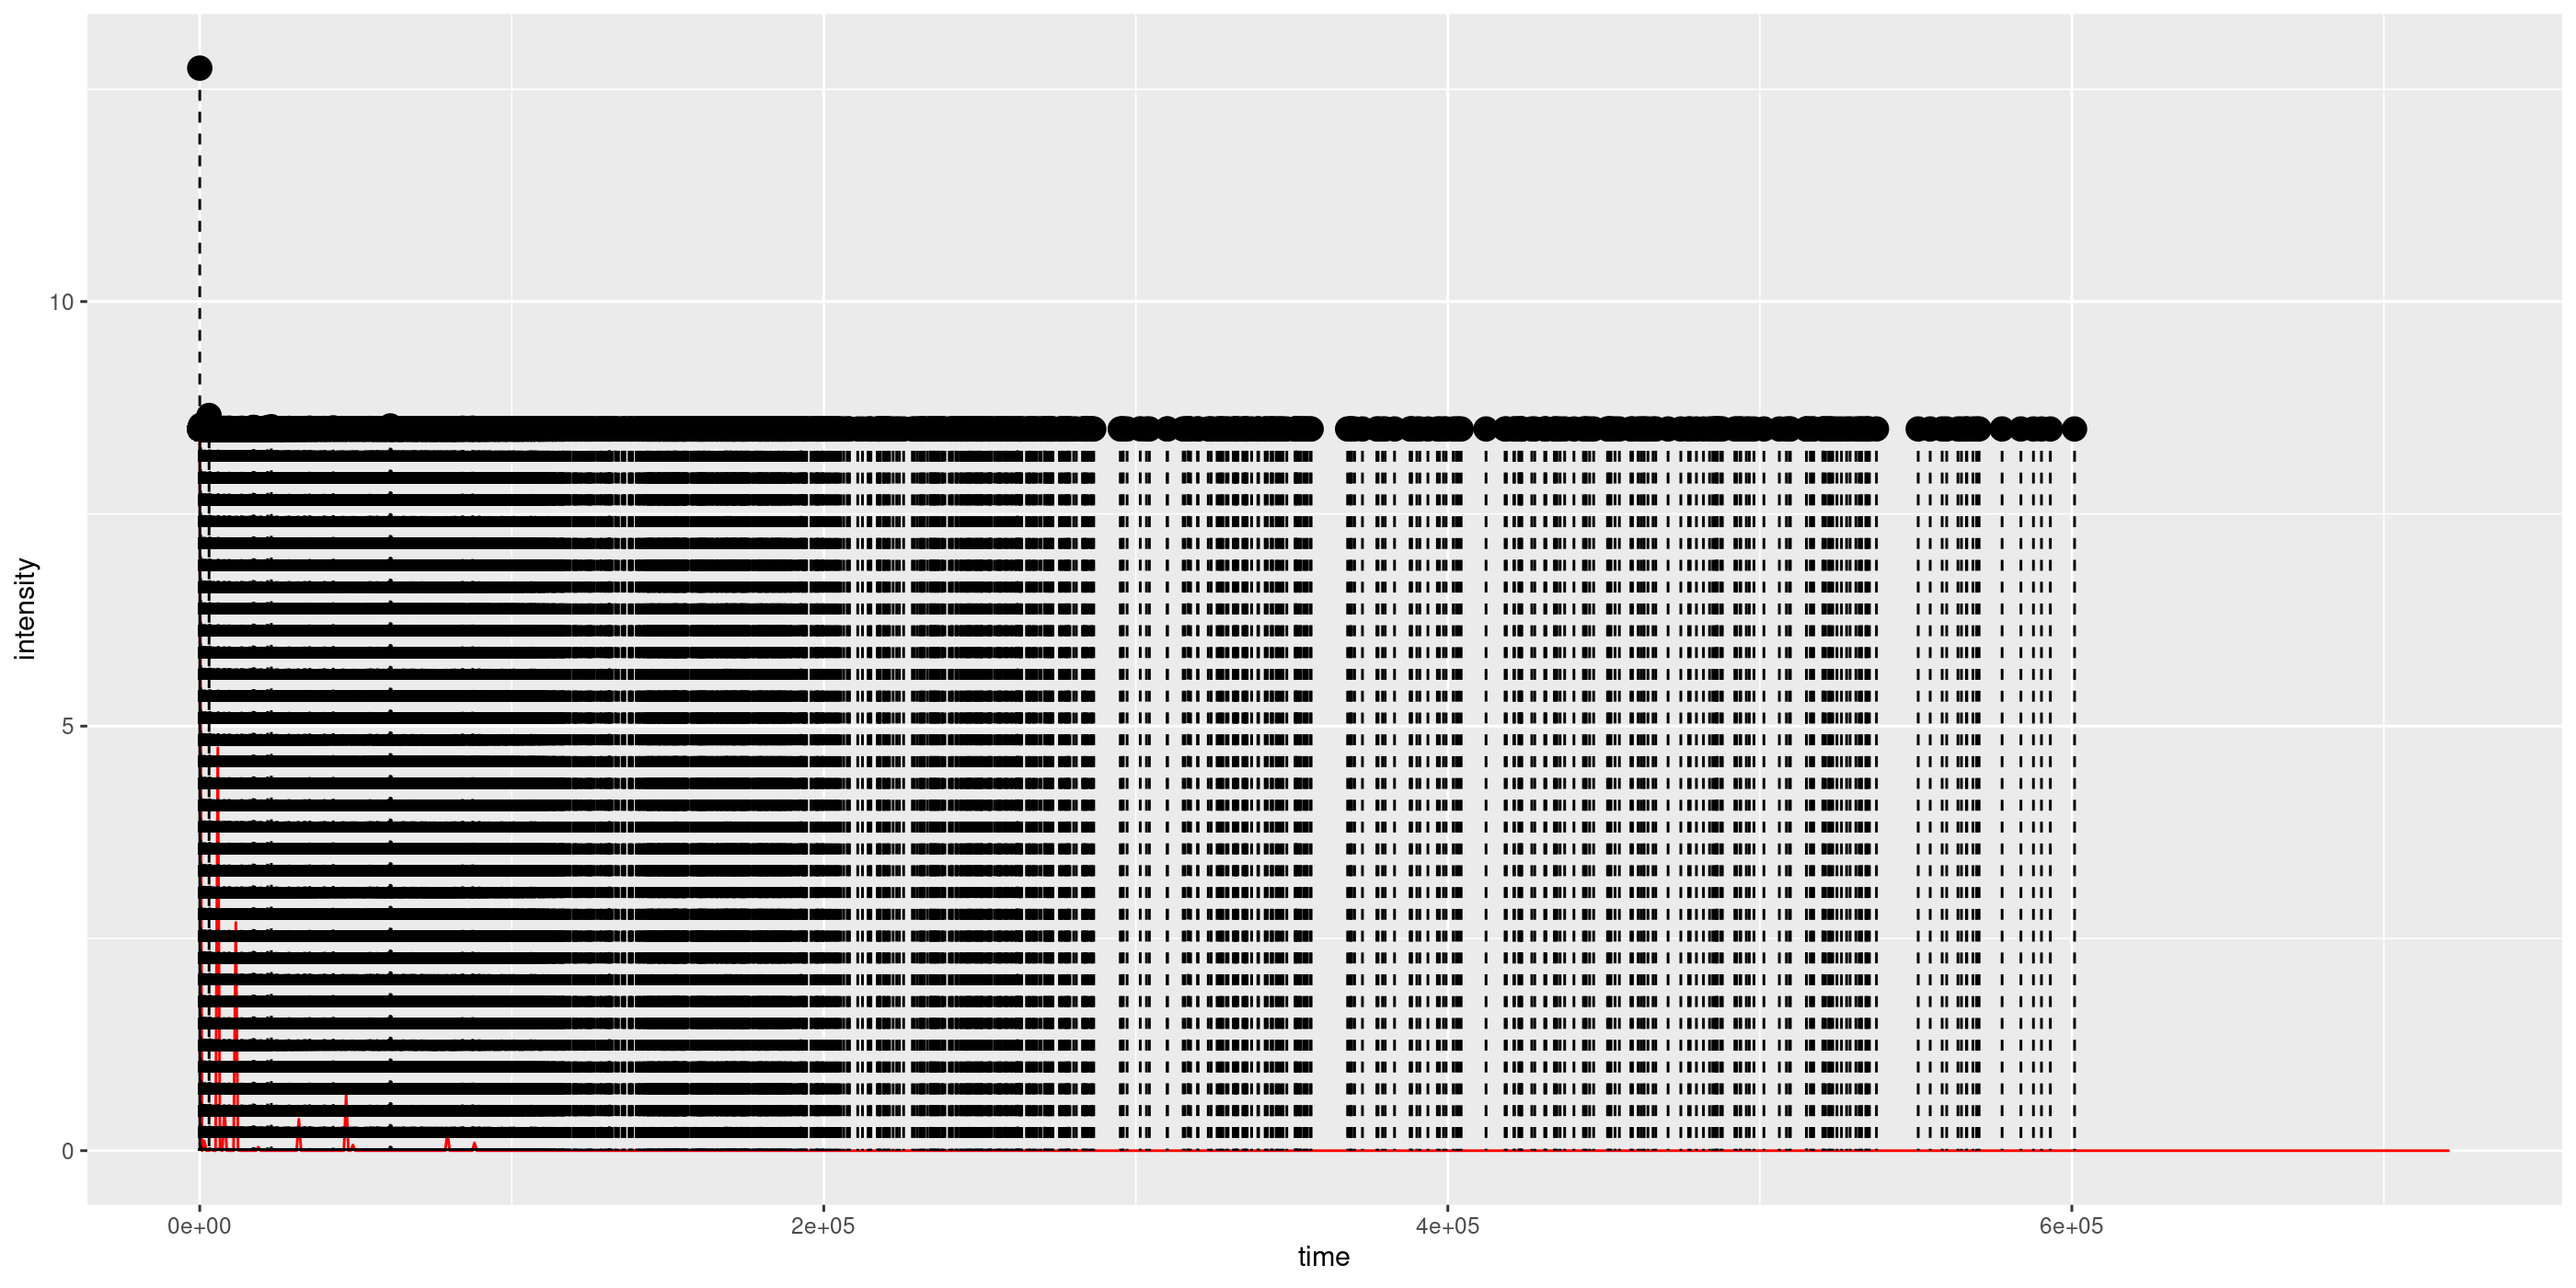

In [37]:
plot_event_series(second_model, cascade = second_cascade)

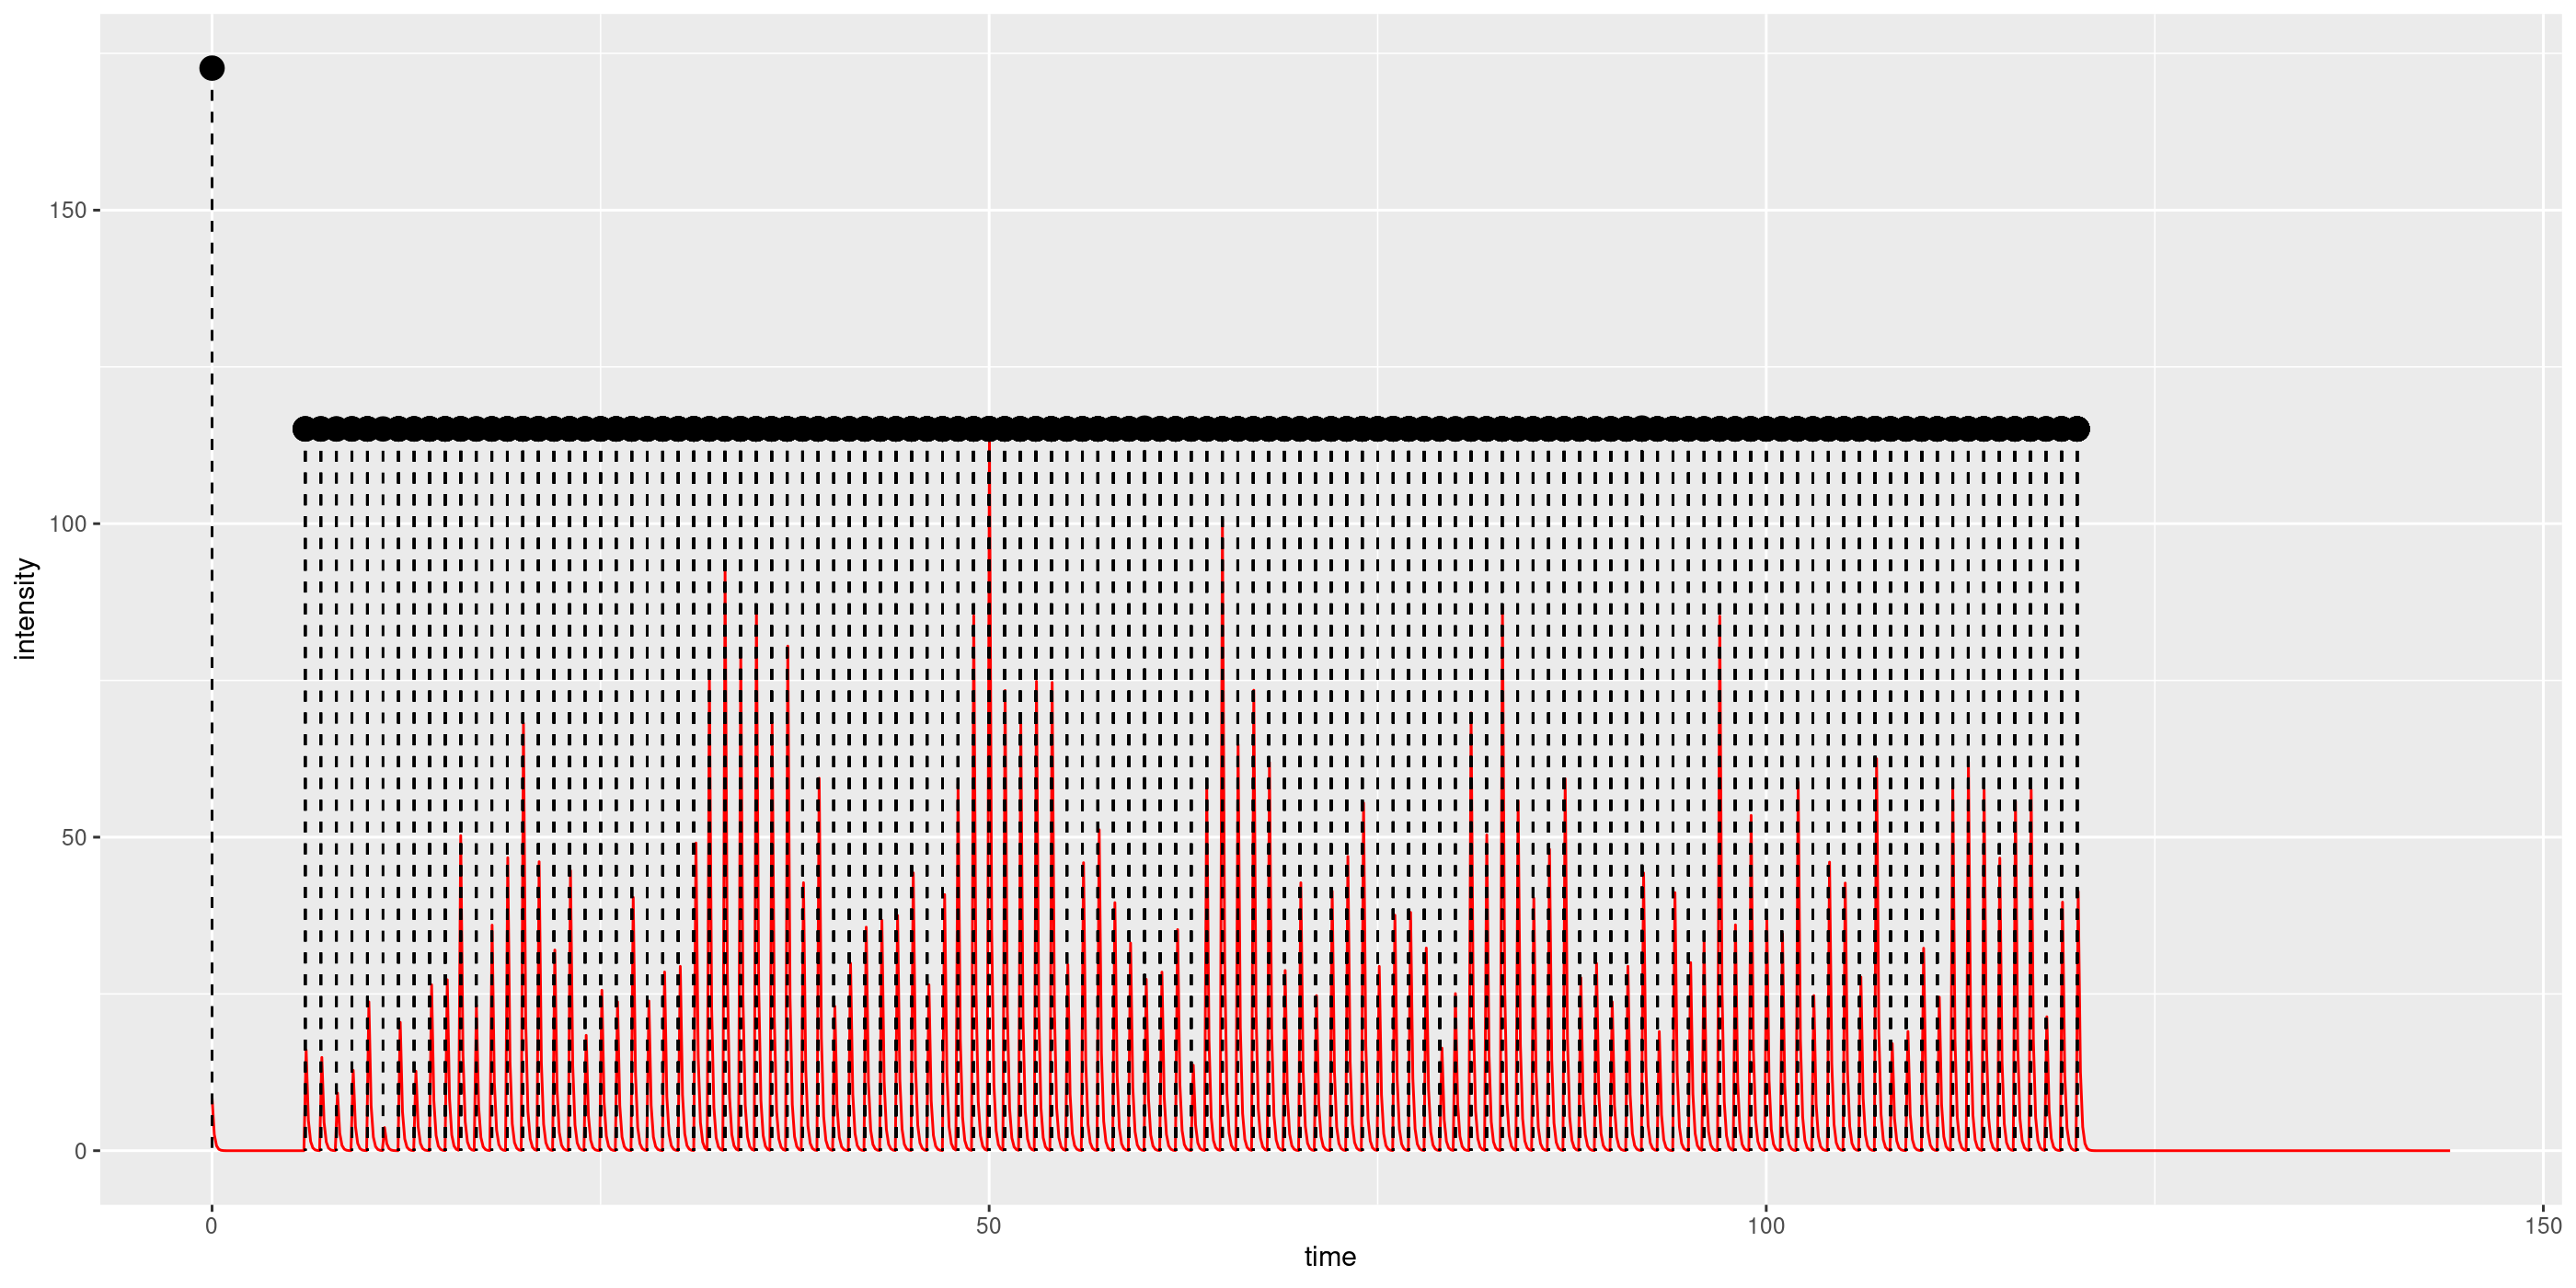

In [38]:
plot_event_series(second_model)

## Przewidywanie liczby zdarzeń

In [39]:
get_branching_factor(first_model)

[1] 0.9031908

In [40]:
get_branching_factor(second_model)

[1] 0.9999959

In [41]:
predict_final_popularity(first_model)

[1] 1135.038

In [45]:
nrow(first_cascade)

[1] 16422

In [44]:
predict_final_popularity(second_model)

[1] 2221506

In [46]:
nrow(second_cascade)

[1] 16123

In [42]:
sprintf("%0.2f%%", 100*abs(nrow(first_cascade)-predict_final_popularity(first_model))/nrow(first_cascade))

[1] "93.09%"

In [43]:
sprintf("%0.2f%%", 100*abs(nrow(second_cascade)-predict_final_popularity(second_model))/ nrow(second_cascade))

[1] "13678.49%"